# MODEL

In [28]:
# importando las librerias
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
# plots
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from scipy.stats import norm, skew #for some statistics
%matplotlib inline 

from sklearn.model_selection import cross_val_score

# MODELS
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# ANN
from sklearn.neural_network import MLPRegressor



In [29]:
XC = pd.read_csv('./pre/XC.csv')
XD = pd.read_csv('./pre/XD.csv')

In [30]:
# XC.head(3)
# XD.head(3)

### **IMPUTACION**

In [31]:
# XC.notnull().apply(pd.Series.value_counts)
# XD.notnull().apply(pd.Series.value_counts)

In [32]:
imputer = Imputer(missing_values=np.nan, strategy='mean', axis=1)

/opt/anaconda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [33]:
valuesC = imputer.fit_transform(XC)
valuesD = imputer.fit_transform(XD)

In [34]:
# datos sin Nans
# valuesC
valuesD

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 1., 0., 0.],
       [0., 3., 0., ..., 1., 0., 0.],
       ...,
       [0., 3., 0., ..., 0., 1., 0.],
       [0., 5., 1., ..., 0., 1., 0.],
       [0., 4., 1., ..., 0., 1., 0.]])

In [35]:
# datos con NaNs...
# XC.values
# XD.values

In [36]:
# llevando este array a un Dataframe
Xc = pd.DataFrame(valuesC)
Xd = pd.DataFrame(valuesD)

### **ADDED LABELS TO DATASET**

In [37]:
Xc.columns = XC.columns
Xd.columns = XD.columns

In [38]:
# Xc.columns
Xd.columns

Index(['amoblado', 'bathroom', 'baulera', 'bedroom', 'dimension_built',
       'dimension_ground', 'garage', 'id_neighborhood', 'latitud', 'longitud',
       'price', 'status', 'year_built', 'riesgo__alto', 'riesgo__bajo',
       'riesgo__moderado', 'riesgo__muy bajo'],
      dtype='object')

In [39]:
Xc.sample(3)
# Xd.head(3)

,amoblado,bathroom,baulera,bedroom,dimension_built,dimension_ground,garage,id_neighborhood,latitud,longitud,price,status,year_built,riesgo__alto,riesgo__bajo,riesgo__moderado,riesgo__muy bajo
338,0.0,4.0,0.0,3.0,152.0,170.0,3.0,242.0,-16.546450,-68.054230,149000.0,1.0,2018.000000,1.0,0.0,0.0,0.0
532,0.0,2.0,0.0,3.0,215.0,645.0,1.0,43.0,-16.488657,-68.100113,300000.0,2.0,1984.000000,0.0,1.0,0.0,0.0
340,0.0,4.0,0.0,3.0,241.0,540.0,2.0,29.0,-16.514803,-68.057266,285000.0,2.0,17858.589246,1.0,0.0,0.0,0.0


/opt/anaconda/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


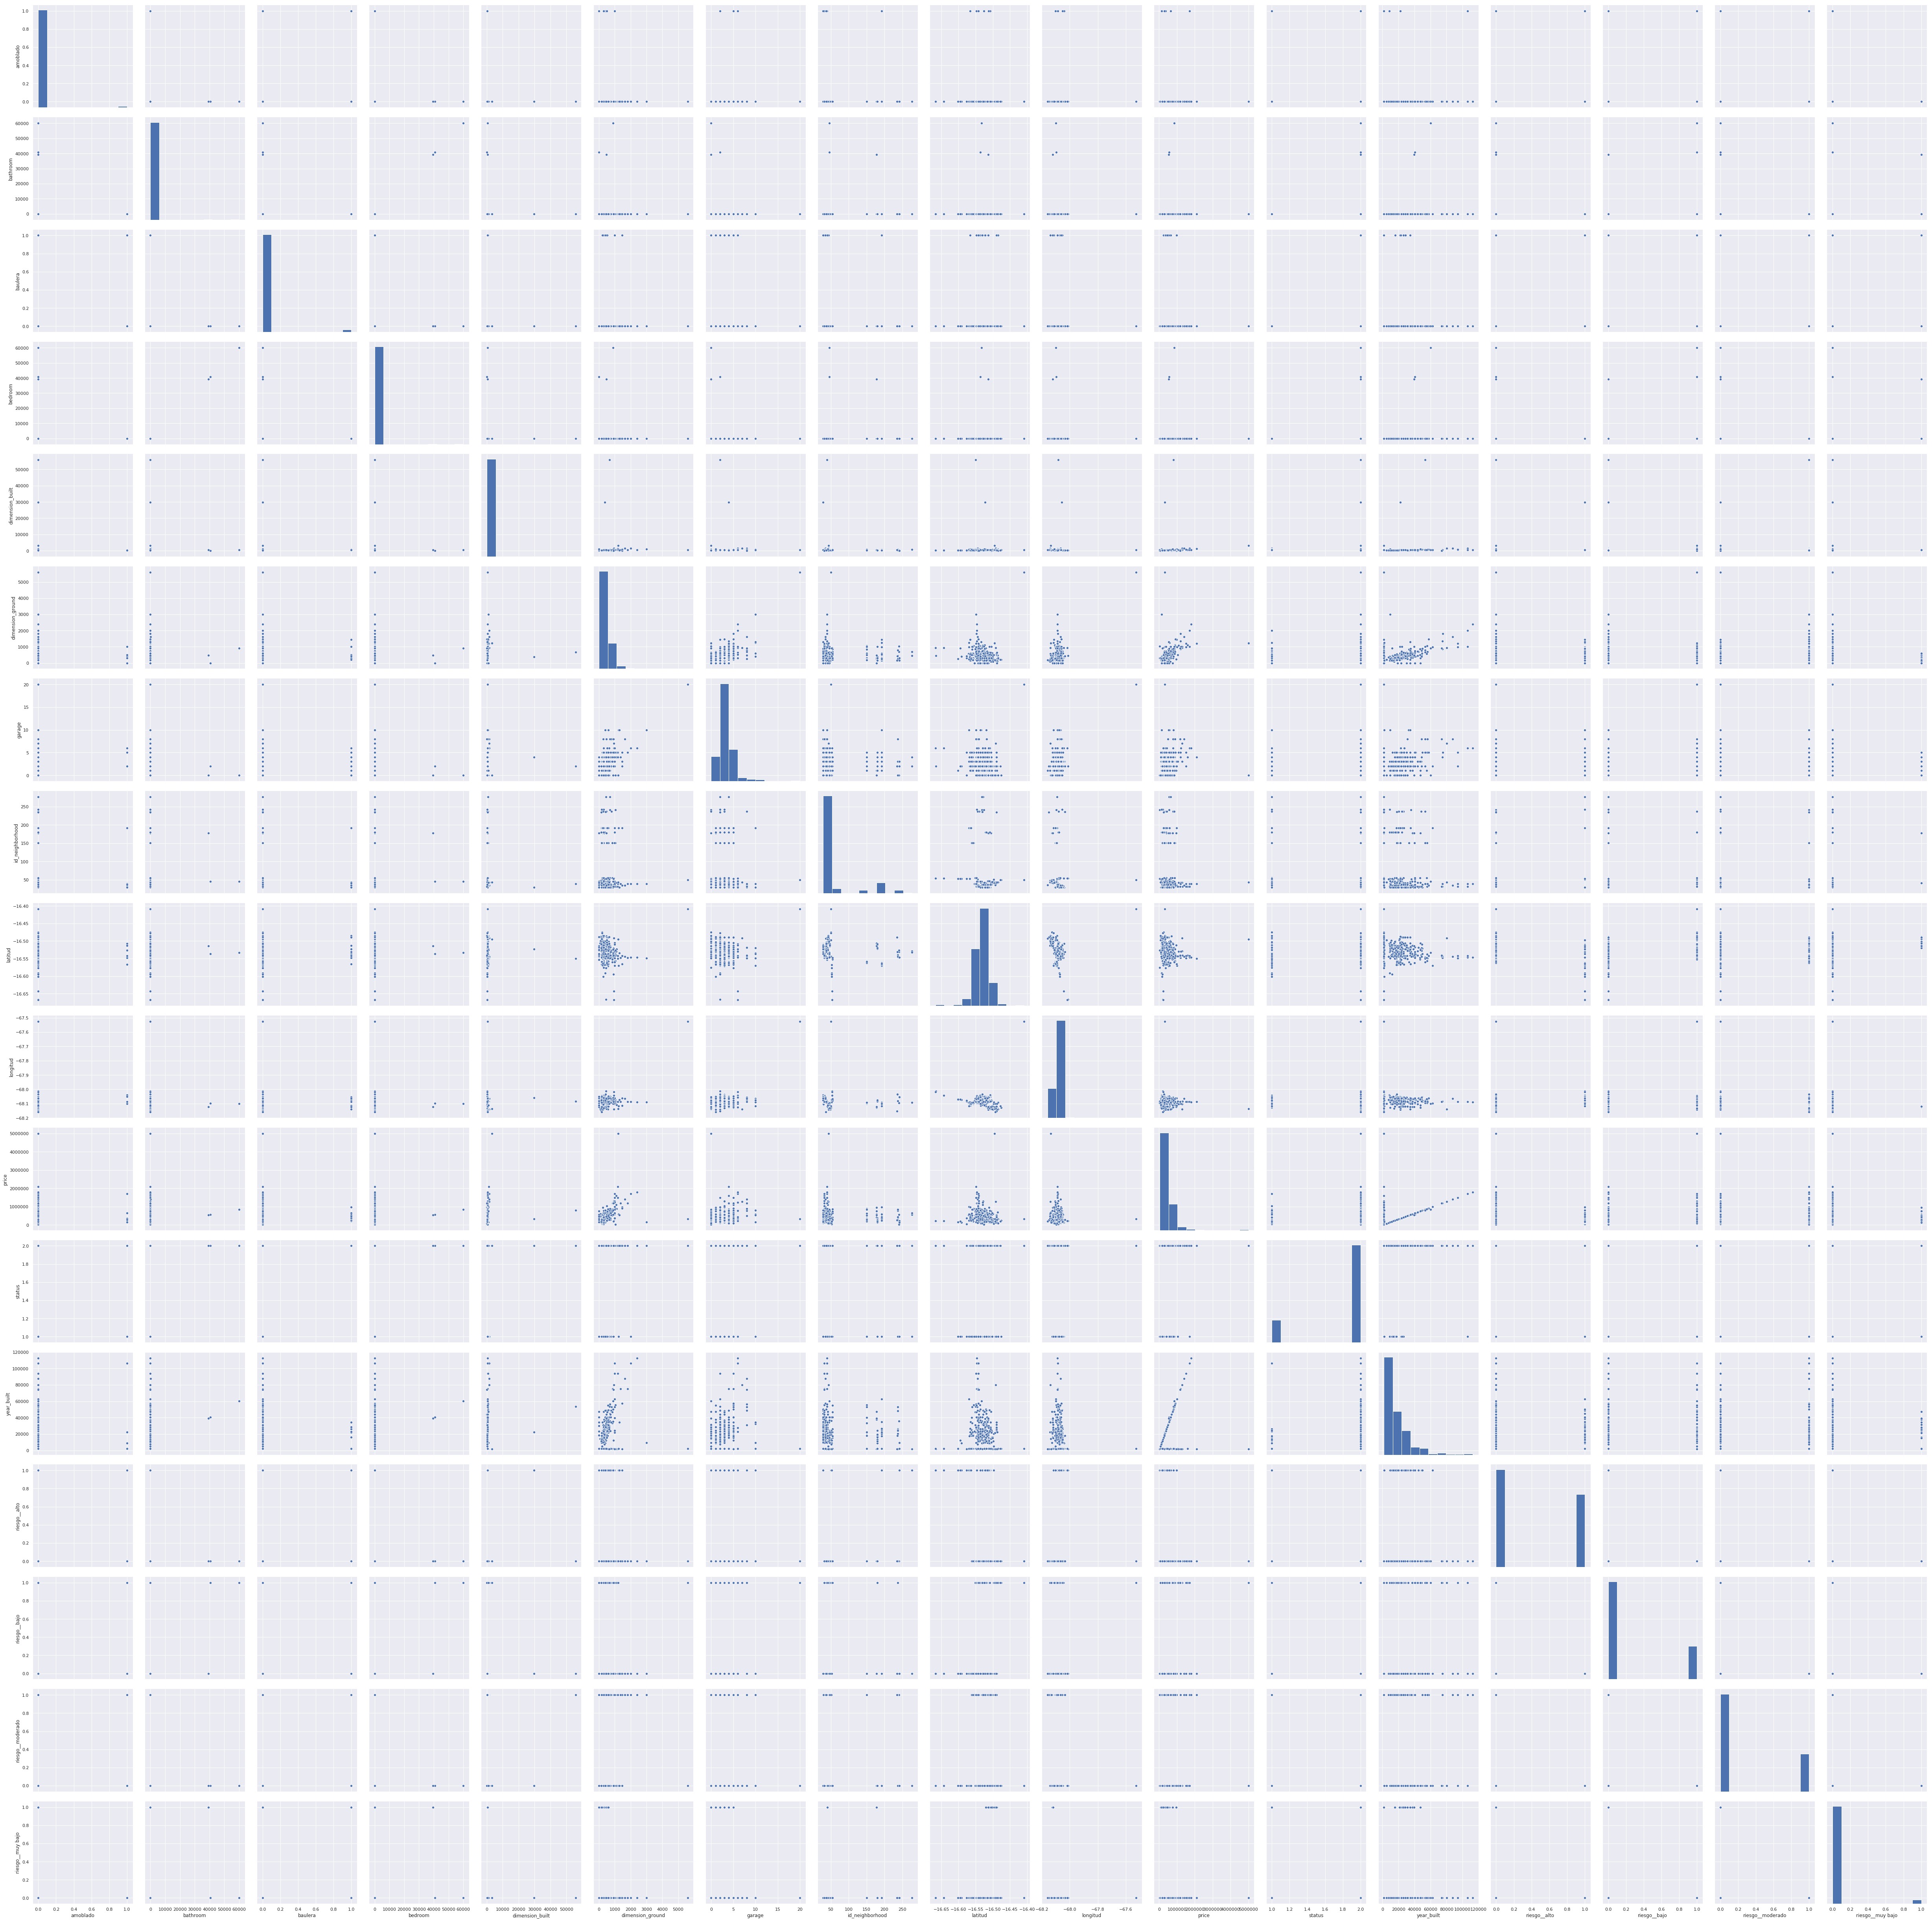

In [40]:
sb.set()
cols = Xc.columns
sb.pairplot(Xc[cols], size = 4)
plt.show();

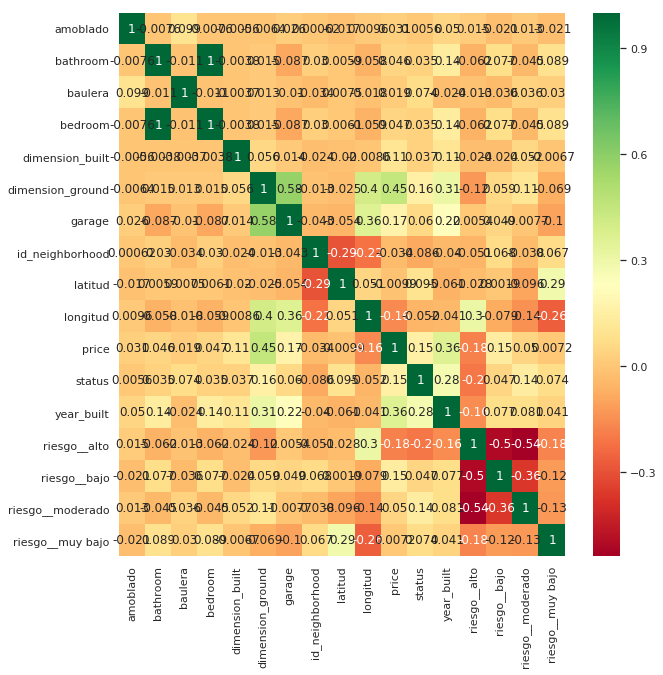

In [41]:
# most correlated features
corrmat = Xc.corr()
top_corr_features = corrmat.index[abs(corrmat["price"])>0]
plt.figure(figsize=(10,10))
g = sb.heatmap(Xc[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [42]:
Yc = Xc['price']
Yd = Xd['price']

In [43]:
Xc = Xc.drop('price', axis = 1)
Xd = Xd.drop('price', axis = 1)

In [44]:
# Yc.head()
# Yd.head()

# Yc.shape
# Yd.shape

# PLOTS

# splitting data

In [45]:
# 50% en train    |   50% en test
XC_train, XC_test, YC_train, YC_test = train_test_split(Xc, Yc, test_size = 0.5, random_state=1)
XD_train, XD_test, YD_train, YD_test = train_test_split(Xd, Yd, test_size = 0.5, random_state=1)

##  **MODELS**

   - LinearRegression,
   - Ridge,
   - Lasso,
   - ElasticNet,
   - KNeighborsRegressor,
   - DecisionTreeRegressor,
   - SVR,
   - RandomForestRegressor,
   - GradientBoostingRegressor
   - ANN

## linear regression

In [46]:
lr = LinearRegression()

lr.fit(XC_train, YC_train)
lr.score(XC_train, YC_train)

0.635440838467572

In [47]:
lr.coef_
lr.intercept_ 

-47914951.179167315

#### **PREDICTING**

In [48]:
pp = XC_test.iloc[0]
pp

amoblado               0.000000
bathroom               3.000000
baulera                0.000000
bedroom                9.000000
dimension_built      380.000000
dimension_ground     571.000000
garage                 1.000000
id_neighborhood       41.000000
latitud              -16.519915
longitud             -68.116325
status                 2.000000
year_built          1980.000000
riesgo__alto           0.000000
riesgo__bajo           0.000000
riesgo__moderado       0.000000
riesgo__muy bajo       1.000000
Name: 293, dtype: float64

In [107]:
pp = XC_test.sample(1)
# pp = XC_train.sample(1)
pp

,amoblado,bathroom,baulera,bedroom,dimension_built,dimension_ground,garage,id_neighborhood,latitud,longitud,status,year_built,riesgo__alto,riesgo__bajo,riesgo__moderado,riesgo__muy bajo
139,0.0,4.0,0.0,3.0,260.0,150.0,2.0,29.0,-16.508095,-68.053833,1.0,2019.0,1.0,0.0,0.0,0.0


In [108]:
# predict recibe una matriz o serie
prediction = lr.predict(pp)
prediction

array([156469.36763284])

### **RIDGE**

In [109]:
np.random.seed(0)

clf = Ridge(alpha=1.0)
clf.fit(XC_train, YC_train) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [110]:
clf.predict(pp)

array([151686.77635781])

### **LASSO**

In [111]:
lasso = Lasso()
lasso.fit(XC_train, YC_train)

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [112]:
lasso.predict(pp)

array([183465.80852392])

### **ELASTIC NET**

In [113]:
regr = ElasticNet(random_state=0)
regr.fit(XC_train, YC_train)

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [114]:
regr.predict(pp)

array([197187.35873646])

### KNN

In [115]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(XC_train, YC_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [116]:
neigh.predict(pp)

array([226500.])

### DecisionTreeRegressor

In [117]:
# otro
regressor = DecisionTreeRegressor(random_state=0)
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

In [118]:
regressor.fit(XC_train, YC_train)

regr_1.fit(XC_train, YC_train)
regr_2.fit(XC_train, YC_train)



DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [119]:
# Predict
regressor.predict(pp)

# regr_1.predict(pp)
# regr_2.predict(pp)

array([167000.])

### RANDOM FOREST

In [120]:
rf = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
rf.fit(XC_train, YC_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [121]:
rf.predict(pp)

array([336671.78328933])

### GRADIENT BOOSTING

In [122]:
alpha = 0.95
gb = GradientBoostingRegressor(loss='quantile', alpha=alpha,n_estimators=250, max_depth=3, learning_rate=.1, min_samples_leaf=9, min_samples_split=9)

gb.fit(XC_train, YC_train)

GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=9, min_samples_split=9,
             min_weight_fraction_leaf=0.0, n_estimators=250,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [123]:
gb.predict(pp)

array([287785.02476007])

### SVR

In [124]:
svr = SVR(kernel='linear')
svr.fit(XC_train,YC_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [125]:
svr.predict(pp)

array([196765.70197227])

# ANN

In [126]:
rate1 = 0.005
rate2 = 0.1

mlpr = MLPRegressor(hidden_layer_sizes=(12,10), max_iter=700, learning_rate_init=rate1)

# trained = mlpr.fit(x_train, y_train)  # should I fit before cross val?
# predicted = mlpr.predict(x_test)      

scores = cross_val_score(mlpr, XC_train, YC_train, cv=6)
print(scores)

/opt/anaconda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[-1.67190562e+02  7.93262577e-01  5.64153955e-01  7.76964335e-01
  2.49978254e-01 -4.62948041e+03]


/opt/anaconda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [127]:
scores.mean()

-799.0477694318288

In [128]:
# HIDDEN LAYERS!!!!!!!!!
mlpr = MLPRegressor(hidden_layer_sizes=(12,10), max_iter=700, learning_rate_init=rate1)

trained = mlpr.fit(XC_train, YC_train)  # should I fit before cross val?
predicted = mlpr.predict(XC_test)      

scores = cross_val_score(mlpr, XC_train, YC_train, cv=5)
print(scores)

/opt/anaconda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[-5.14435949e+01  6.29170942e-01  7.88915684e-01  3.38218261e-01
 -6.21025004e+03]


/opt/anaconda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [129]:
scores.mean()

-1251.9874664210415

In [130]:
# coefs_ is a list of weight matrices, where weight matrix at index i represents the weights between layer i and layer i+1.
# len(mlpr.coefs_)

# len(mlpr.coefs_[0])

# intercepts_ is a list of bias vectors, where the vector at index i represents the bias values added to layer i+1.
# len(mlpr.intercepts_[0])

In [131]:
mlpr.predict(pp)
# mlpr.predict([np.array([0,2,0,4,297,2,-16.515982,-68.088051,0.0,2.0,2014,0.0,1.0,0.0,0.0])])

array([83931.51650943])

## EXPORTING THE MODEL

In [ ]:
import pickle 
pickle.dump(gb, open('./model.pkl', 'wb'))